In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Tweets.csv")

In [ ]:
df.shape

(14640, 15)

In [ ]:
# Find & Remove duplicates
duplicateDFRow = df[df.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

In [ ]:
#removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
duplicateDFRow = df[df.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape[0]

0

In [ ]:
# New Shape
df.shape

(14604, 15)

# Text Pre-Processing

In [ ]:
# Check the count of the sentiment
sentiment_counts=df['airline_sentiment'].value_counts()
print(sentiment_counts)

airline_sentiment
negative    9159
neutral     3091
positive    2354
Name: count, dtype: int64


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Select only text & airline sentiment
df_clean = df[['text','airline_sentiment']]

In [ ]:
# Check the shape of df_clean
df_clean.shape

(14604, 2)

In [ ]:
df_clean.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import unicodedata

In [ ]:
# Stopword List
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords = stopwords.words('english')

custom_remove_list = ['flight']

stopwords_NEW = set(stopwords + custom_remove_list)

In [ ]:
# View
df_clean.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
def clean_text(text):
    # Remove Punctuation, URLs, Mentions, Emojis, Digits, Non-ASCII, etc.
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub(r'http[s]?://\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove emojis
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.strip().lower()  # Strip and convert to lowercase
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')  # Remove Non-ASCII
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords_NEW])

    # Return the cleaned text
    return text

In [ ]:
# Apply the cleaning function to the DataFrame
df_clean['clean_text'] = df_clean['text'].apply(clean_text)

In [ ]:
# Encode labels
Negative = 1
Positive = 2
Netural = 0
label_map = {
    'negative': Negative,
    'neutral': Netural,
    'positive': Positive
}
df_clean['sentiment score'] = df_clean['airline_sentiment'].map(label_map)

In [ ]:
df_clean.head()

,text,airline_sentiment,clean_text,sentiment score
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said,0
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus youve added commercials exp...,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica didnt today must mean need take ...,0
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...,1
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing,1


In [ ]:
# Word cloud for Positive sentiment
from wordcloud import WordCloud

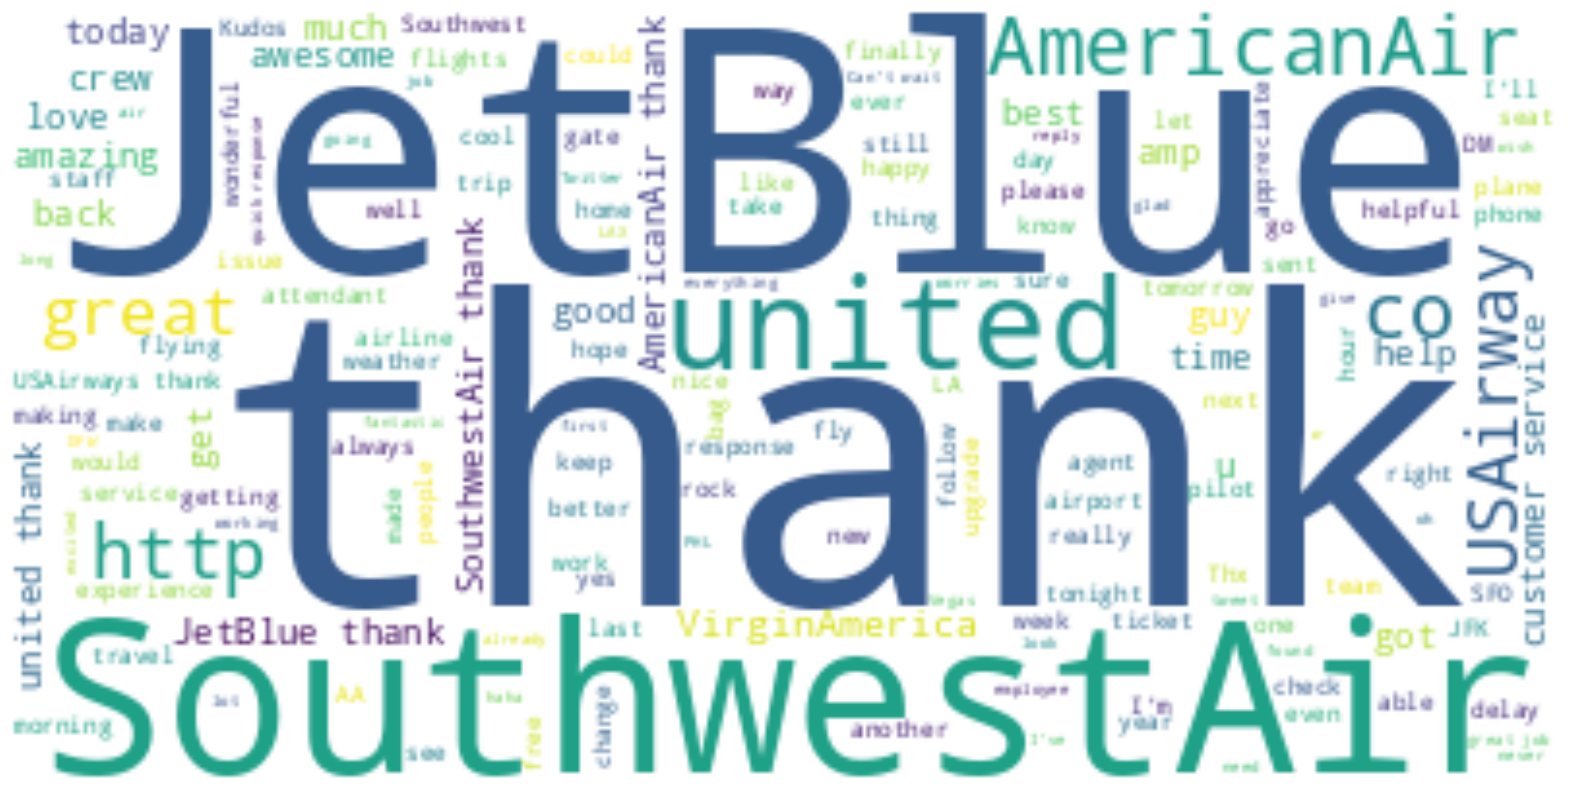

In [ ]:
# Positive Word Clouds
positive_tweets = df_clean[df_clean['sentiment score'] == 1]
positive_text = ' '.join(positive_tweets['text'])

wordcloud = WordCloud(stopwords=stopwords_NEW,
    background_color="white").generate(positive_text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

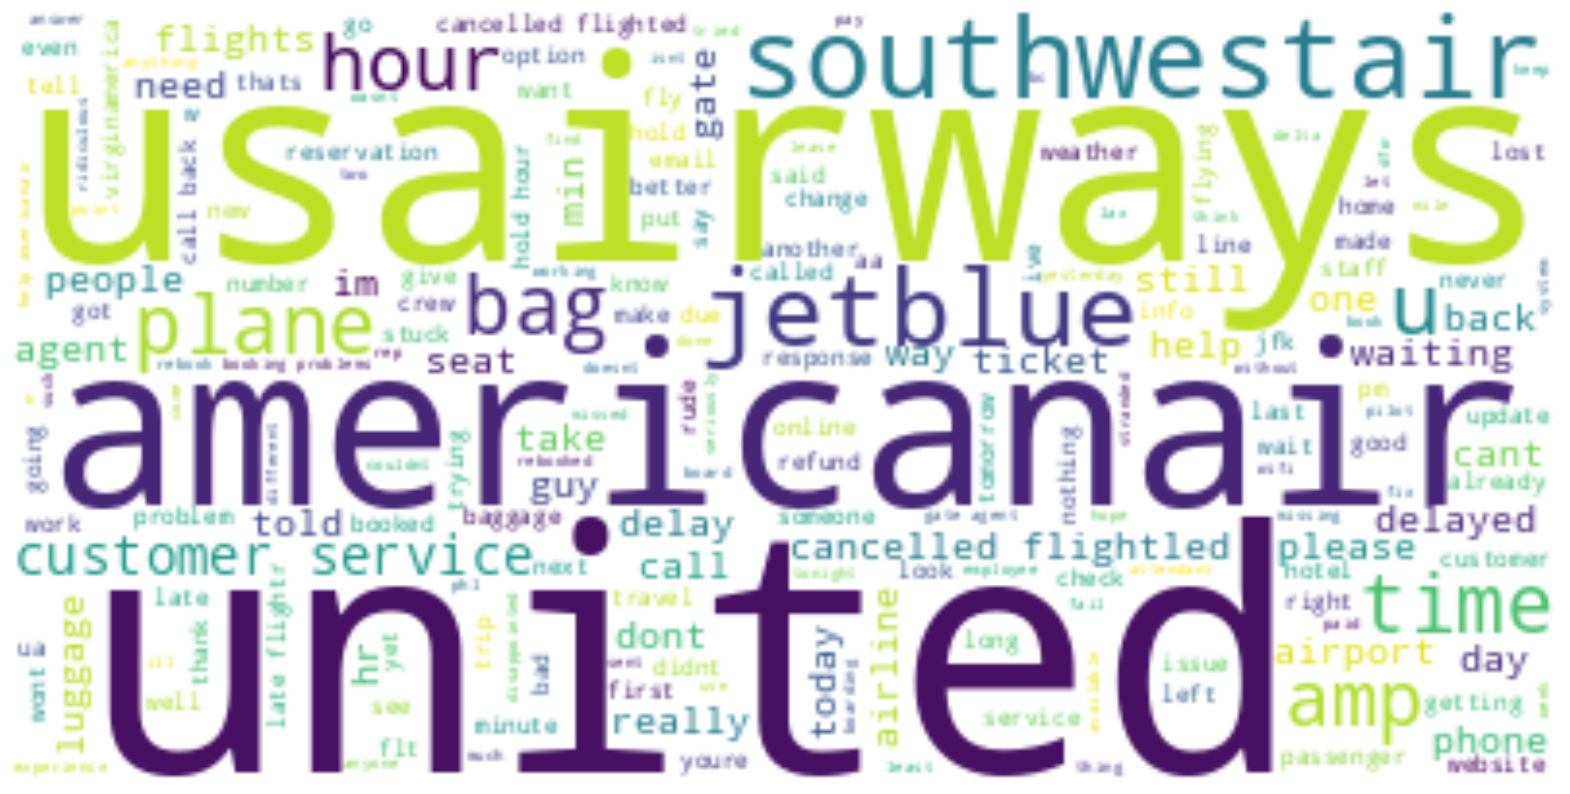

In [ ]:
# Negative cloud
negative_tweets = df_clean[df_clean['sentiment score'] == -1]
negative_text = ' '.join(negative_tweets['text'])

wordcloud = WordCloud(background_color="white").generate(negative_text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
class_counts = df_clean['sentiment score'].value_counts()

In [ ]:
# Find the minimum count across the classes
min_count = class_counts.min()

In [ ]:
# Downsample each class to the minimum count
balanced_df = df_clean.groupby('sentiment score').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

In [ ]:
# Upsample the minority classes to match the majority class count
max_count = class_counts.max()

In [ ]:
# Upsample each minority class to the maximum count
balanced_df = df_clean.groupby('sentiment score').apply(lambda x: x.sample(max_count, replace=True, random_state=42)).reset_index(drop=True)

In [ ]:
# Downsample majority class
downsampled_majority = df_clean[df_clean['sentiment score'] == 1].sample(min_count, random_state=42)

# Upsample minority classes
upsampled_minority_0 = df_clean[df_clean['sentiment score'] == 0].sample(min_count, replace=True, random_state=42)
upsampled_minority_2 = df_clean[df_clean['sentiment score'] == 2].sample(min_count, replace=True, random_state=42)

# Combine all classes into a balanced DataFrame
balanced_df = pd.concat([downsampled_majority, upsampled_minority_0, upsampled_minority_2]).reset_index(drop=True)

In [ ]:
df_clean_1 = balanced_df

df_clean_1.shape


(7062, 4)

In [ ]:
df_clean_1

,text,airline_sentiment,clean_text,sentiment score
0,@united airlines delayed our flight on the way...,negative,united airlines delayed way chicago leaving ch...,1
1,@SouthwestAir Yes - with extra $77. I wonder w...,negative,southwestair yes extra wonder going yo loose room,1
2,@USAirways I keep thinking this is a massive p...,negative,usairways keep thinking massive practical joke...,1
3,@united And then when we asked the stewardess ...,negative,united asked stewardess take disinfectant wipe...,1
4,@JetBlue keeps asking me to enter a valid emai...,negative,jetblue keeps asking enter valid email address...,1
...,...,...,...,...
7057,@AmericanAir - keeping AA up in the Air! My cr...,positive,americanair keeping aa air crew chief cousin a...,2
7058,@SouthwestAir is there a way to know who check...,positive,southwestair way know checked bag curb awesome...,2
7059,@VirginAmerica I was so glad it was mentioned....,positive,virginamerica glad mentioned took first virgin...,2
7060,@USAirways Thks US #1786 2/19 PHL to FLL. Over...,positive,usairways thks us phl fll overall st class imp...,2


In [ ]:
# View the count of sentiment at df_clean_1
sentiment_counts=df_clean_1['sentiment score'].value_counts()
print(sentiment_counts)

sentiment score
1    2354
0    2354
2    2354
Name: count, dtype: int64


In [ ]:
# Assuming your DataFrame has been created and contains the necessary columns
train_df, test_df = train_test_split(df_clean_1, test_size=0.2, random_state=42, stratify=df_clean_1['sentiment score'])

In [ ]:
train_df.shape

(5649, 4)

In [ ]:
# Step 3: Prepare training data
Reviews = train_df['clean_text'].tolist()  # Get cleaned text
Target = np.array(train_df['sentiment score'].tolist())   # # Convert to numpy array

In [ ]:
# Step 4: Prepare test data
test_reviews = test_df['clean_text'].tolist()  # Get cleaned text for test
test_targets = np.array(test_df['sentiment score'].tolist())  # Convert to numpy array

In [ ]:
x_val, x_test, y_val, y_test = train_test_split(test_reviews,
                                                    test_targets,
                                                    test_size=0.5,
                                                    stratify = test_targets)

In [ ]:
# Apply BERT-Pretained Embedding

In [ ]:
# Install tensorflow, keras & transform libraries
!pip install tensorflow==2.12.0 keras==2.12.0 transformers==4.29.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.9/111.9 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 778.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.2 MB/s eta 0:0

In [ ]:
import transformers
#print(transformers.__version__)

In [ ]:
from transformers import (
    AdamW,
    BertModel,
    BertTokenizer,
    get_linear_schedule_with_warmup,
    TFBertForSequenceClassification
)


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow as tf

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# View the length of the frequency used token
token_lens = []

for txt in df_clean_1['clean_text']:
    tokens = tokenizer.encode(txt, add_special_tokens=False)
    token_lens.append(len(tokens))

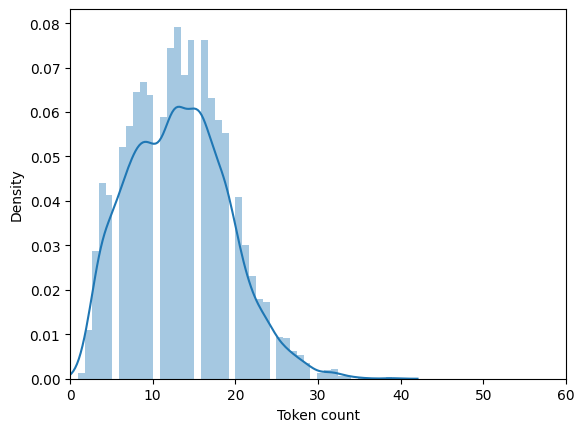

In [ ]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 60]);
plt.xlabel('Token count');

In [ ]:
max_len= 60
# Tokenize and encode the sentences
X_train_encoded = tokenizer.batch_encode_plus(Reviews,
                                              padding=True,
                                              truncation=True,
                                              max_length=max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val,
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test,
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')


In [ ]:
# Check the encoded dataset
k = 200
print('Reviews -->>',Reviews[k])
print('Training Comments -->>',Reviews[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Target[k])

Reviews -->> united airline joke person working special services ewr line ppl deep grow
Training Comments -->> united airline joke person working special services ewr line ppl deep grow

Input Ids -->>
 tf.Tensor(
[  101  2142  8582  8257  2711  2551  2569  2578  1041 13088  2240  4903
  2140  2784  4982   102     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0], shape=(41,), dtype=int32)

Decoded Ids -->>
 [CLS] united airline joke person working special services ewr line ppl deep grow [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

Attention Mask -->>
 tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0], shape=(41,), dtype=int32)

Labels -->> 1


In [ ]:
print(X_train_encoded['input_ids'].shape)
print(X_train_encoded['token_type_ids'].shape)
print(X_train_encoded['attention_mask'].shape)
print(Target.shape)

(5649, 41)
(5649, 41)
(5649, 41)
(5649,)


In [ ]:
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler,ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Number of epochs to wait for improvement
    restore_best_weights=True,
    verbose=1
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
# Step 5: Train the model
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    Target,
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
    batch_size=32,
    epochs=3,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/3
177/177 [==============================] - 3057s 17s/step - loss: 0.8987 - accuracy: 0.5640 - val_loss: 0.6790 - val_accuracy: 0.7252 - lr: 2.0000e-05
Epoch 2/3
177/177 [==============================] - 2833s 16s/step - loss: 0.5203 - accuracy: 0.8044 - val_loss: 0.5558 - val_accuracy: 0.7975 - lr: 2.0000e-05
Epoch 3/3
177/177 [==============================] - 2871s 16s/step - loss: 0.3219 - accuracy: 0.8883 - val_loss: 0.5572 - val_accuracy: 0.8187 - lr: 2.0000e-05


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


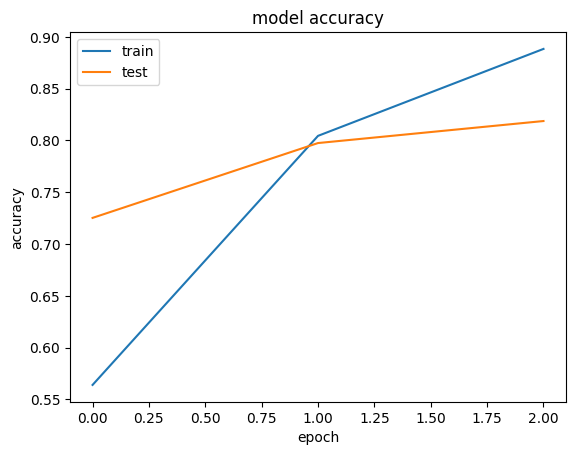

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
    y_test
)

23/23 [==============================] - 106s 4s/step - loss: 0.4876 - accuracy: 0.8345


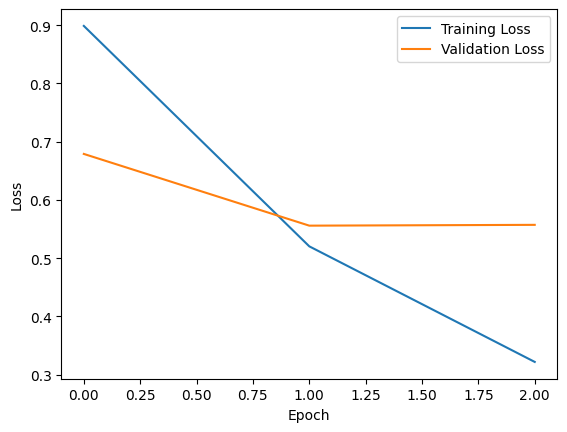

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

Test loss: 0.4875915050506592, Test accuracy: 0.8345119953155518


In [ ]:
# Save the model and tokenizer to the local folder
path = '/content/gdrive/MyDrive/Twitter_Sentiment_Analysis'
# Save tokenizer
tokenizer.save_pretrained(path+'/Tokenizer')
# Save model

model.save_pretrained(path+'/Model')

In [ ]:
# Load the model and tokenizer from the local folder
bert_tokenizer = BertTokenizer.from_pretrained(path +'/Tokenizer')
# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(path +'/Model')

Some layers from the model checkpoint at /content/gdrive/MyDrive/Twitter_Sentiment_Analysis/Model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/gdrive/MyDrive/Twitter_Sentiment_Analysis/Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further trainin

In [ ]:
pred = bert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])


23/23 [==============================] - 111s 5s/step


In [ ]:
# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {
    2: 'positive',
    1: 'Negative',
    0: 'Netural'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

In [ ]:
print('Predicted Label :', pred_labels[:10])
print('Actual Label    :', Actual[:10])

Predicted Label : ['Negative', 'Netural', 'positive', 'positive', 'Netural', 'Netural', 'Netural', 'Netural', 'positive', 'Negative']
Actual Label    : ['Netural', 'Netural', 'positive', 'positive', 'Netural', 'Netural', 'Netural', 'Netural', 'positive', 'Negative']


In [ ]:
# Print classification Report
print(classification_report(Actual, pred_labels))

              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83       236
     Netural       0.83      0.76      0.79       236
    positive       0.86      0.89      0.88       235

    accuracy                           0.83       707
   macro avg       0.83      0.83      0.83       707
weighted avg       0.83      0.83      0.83       707



In [ ]:
def Get_sentiment(Review, Tokenizer=bert_tokenizer, Model=bert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(Review, list):
        Review = [Review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [ ]:
Pos_Review ='''Agent good service.'''

In [ ]:
Get_sentiment(Pos_Review)

1/1 [==============================] - 7s 7s/step


['positive']

In [ ]:
Neg_Review = '''Flight Delayed.'''

In [ ]:
Get_sentiment(Neg_Review)

1/1 [==============================] - 0s 104ms/step


['Negative']

In [ ]:
Netural_Review = '''united help get tonight houstonjust dont want stuck till monday bad weather moving.'''

In [ ]:
Get_sentiment(Netural_Review)

1/1 [==============================] - 0s 140ms/step


['Netural']